In [ ]:
exec(open("init_notebook.py").read())
%load_ext autoreload
%autoreload 2

In [2]:
from sim.LoopSimulator import LoopSimulator
from model.Sender import Sender
from model.Path import Path
from model.SimpleQueuePath import SimpleQueuePath
from model.NoobSender import NoobSender
from model.TTLObserverSender import TTLObserverSender
import pprint
import logging
logging.basicConfig(level=logging.INFO)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [26]:
path = SimpleQueuePath(avgTTL=20, noiseMax=20, maxDataInPipe=12, maxQsize=10000, debug=False)
simulator = LoopSimulator(path, printStatFreq=20)
deliveryRate = 5
# sender = NoobSender(simulator.createSenderId(), deliveryRate, debug=False)
sender = TTLObserverSender(simulator.createSenderId(), deliveryRate, debug=True)
simulator.senders[sender.id] = sender
simulator.run(1000)


INFO:root:
************Time step: 20*********
INFO:root:Packets in-flight: 68
INFO:root:Data in-flight: 1.36KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 40*********
INFO:root:TTLObserverSender:stepUpDeliveryRate avgTTLwindow 24.8
INFO:root:TTLObserverSender:stepUpDeliveryRate 8.064516129032258
INFO:root:Packets in-flight: 102
INFO:root:Data in-flight: 2.04KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 60*********
INFO:root:Packets in-flight: 146
INFO:root:Data in-flight: 2.92KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 80*********
INFO:root:TTLObserverSender:stepUpDeliveryRate avgTTLwindow 25.6
INFO:root:TTLObserverSender:stepUpDeliveryRate 12.600806451612904
INFO:root:Packets in-flight: 181
INFO:root:Data in-flight: 3.62KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 100*********
INFO:root:Packets in-flight: 252
INFO:root:Data in-flight: 5.04KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 120**

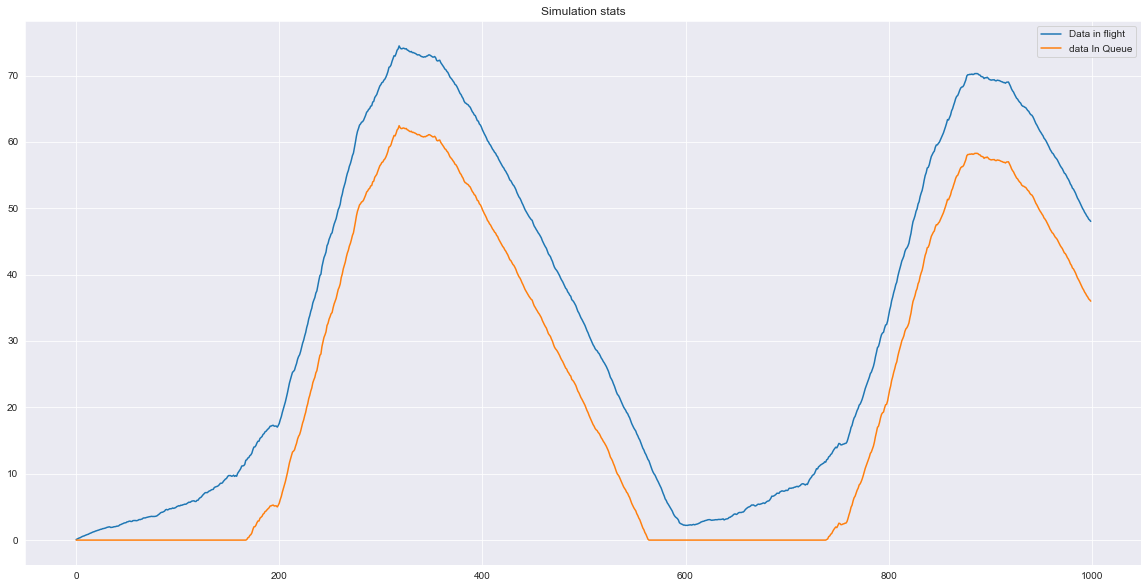

In [27]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], label="Data in flight")
plt.plot(simulator.stats['dataInQueue'], label="data In Queue")
# plt.plot(simulator.stats['packetsInFlight'], label="Packet in flight")
# plt.plot(simulator.stats['packetsInQueue'], label="packets In Queue")
# plt.plot(simulator.stats['packetsSent'], label="Packets Sent")
# plt.plot(simulator.stats['packetsAcked'], label="Packet Acked")
# plt.plot(simulator.stats['totalPacketsSent'], label="Total packets Sent")
# plt.plot(simulator.stats['totalPacketsAcked'], label="Total packet Acked")
plt.title("Simulation stats")
plt.xlabel("time steps")
plt.legend()
plt.show()


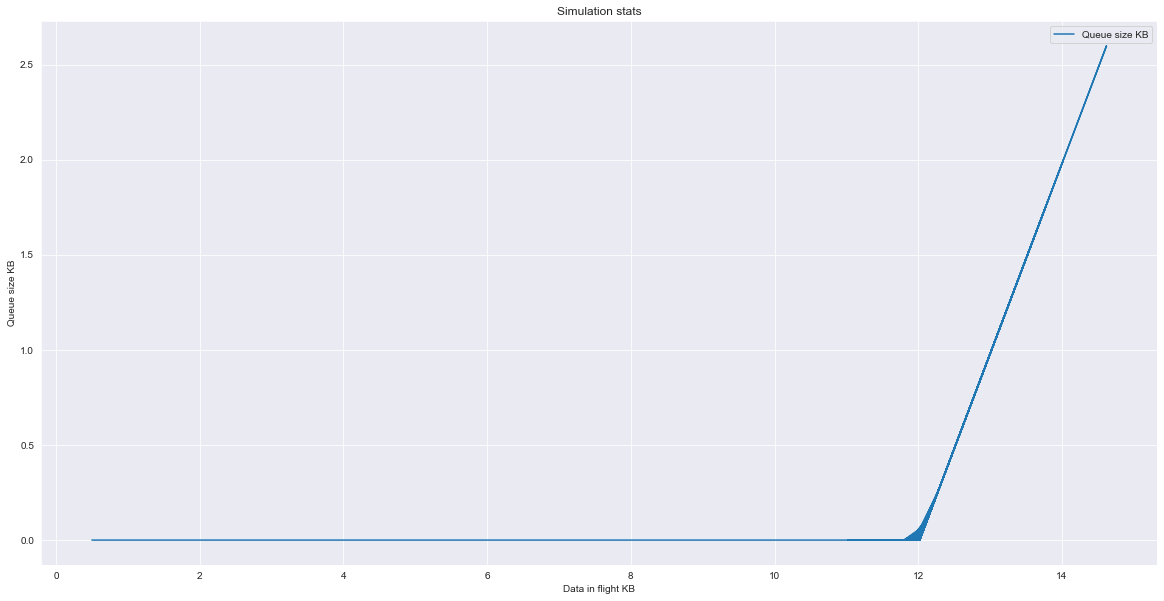

In [6]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], simulator.stats['dataInQueue'], label="Queue size KB")
plt.title("Simulation stats")
plt.xlabel("Data in flight KB")
plt.ylabel("Queue size KB")
plt.legend()
plt.show()

In [7]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
packetStats = analyzerTools.createDfFromPackets(sender.ackedPackets)

<AxesSubplot:xlabel='ttl', ylabel='Count'>

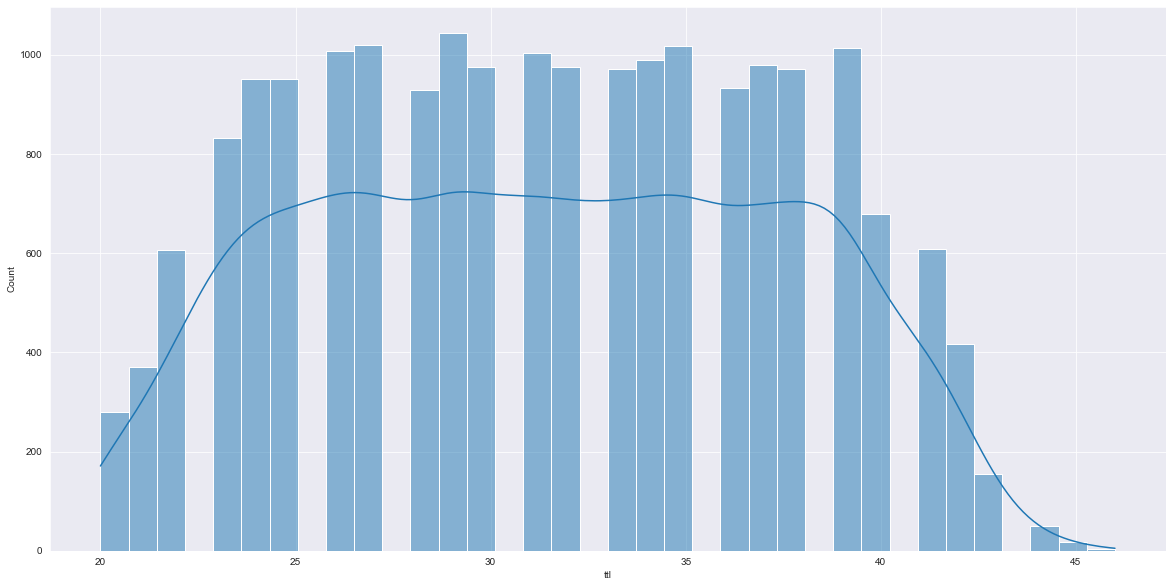

In [8]:

plt.figure(figsize=(20,10))
sns.histplot(packetStats.ttl, kde=True)

In [9]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data = packetStats, x='packNum', y='ttl', color='g')

In [10]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
dfPackets = analyzerTools.createDfFromPackets(sender.ackedPackets)

In [11]:
dfPackets.head()

,packNum,ttl,ttlNoise,sentAt,ackAt,isDropped
0,1,24,4,1,25,False
1,10,36,16,1,37,False
2,100,23,3,5,28,False
3,1000,41,16,41,82,False
4,10000,27,3,486,513,False


In [12]:
print(simulator.stats.keys())
dfStats = analyzerTools.getSenderStatsPerTimeStep(dfPackets, simulator.stats)

dict_keys(['dataInFlight', 'dataInQueue', 'packetsInFlight', 'packetsInQueue', 'packetsSent', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'queueSize'])


In [13]:
dfStats.head()

,avgTTL,minTTL,maxTTL,dataInFlight,dataInQueue
sentAt,,,,,
1,27.720000,21,39,0.88,0.0
2,29.421053,20,39,1.46,0.0
3,30.172414,21,39,1.88,0.0
4,28.619048,20,38,2.44,0.0
5,28.750000,20,38,2.94,0.0


In [14]:
dfStats.tail()

,avgTTL,minTTL,maxTTL,dataInFlight,dataInQueue
sentAt,,,,,
975,22.300000,20,25,11.76,0.0
976,21.400000,20,24,11.92,0.0
977,21.571429,20,23,11.94,0.0
978,20.500000,20,21,11.92,0.0
979,20.333333,20,21,12.02,0.0


<AxesSubplot:xlabel='sentAt'>

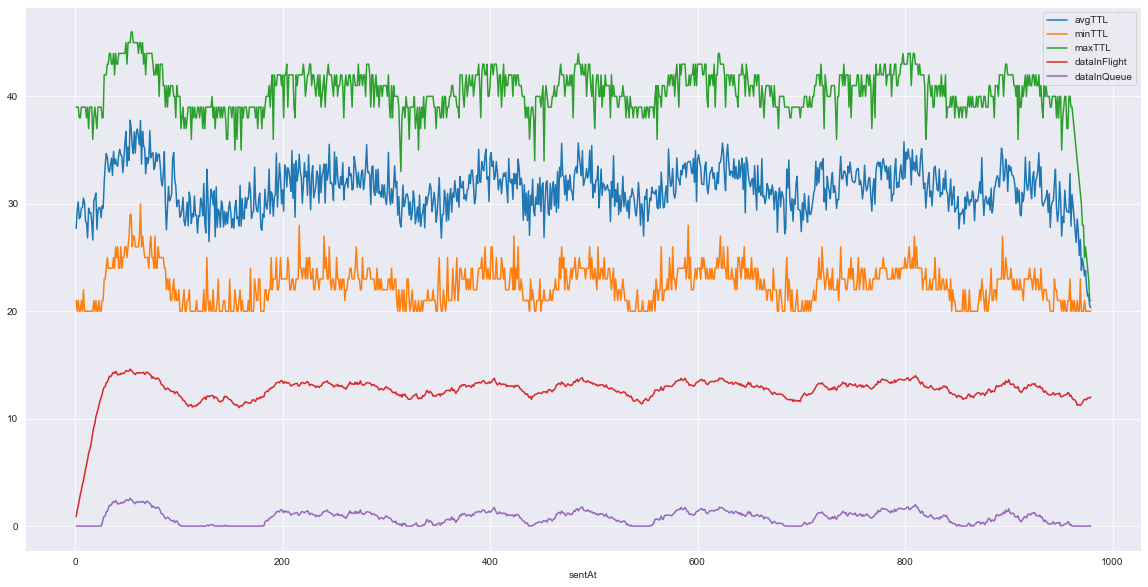

In [15]:
dfStats.plot(figsize=(20,10))

1000
(979,)


<Figure size 1440x720 with 0 Axes>

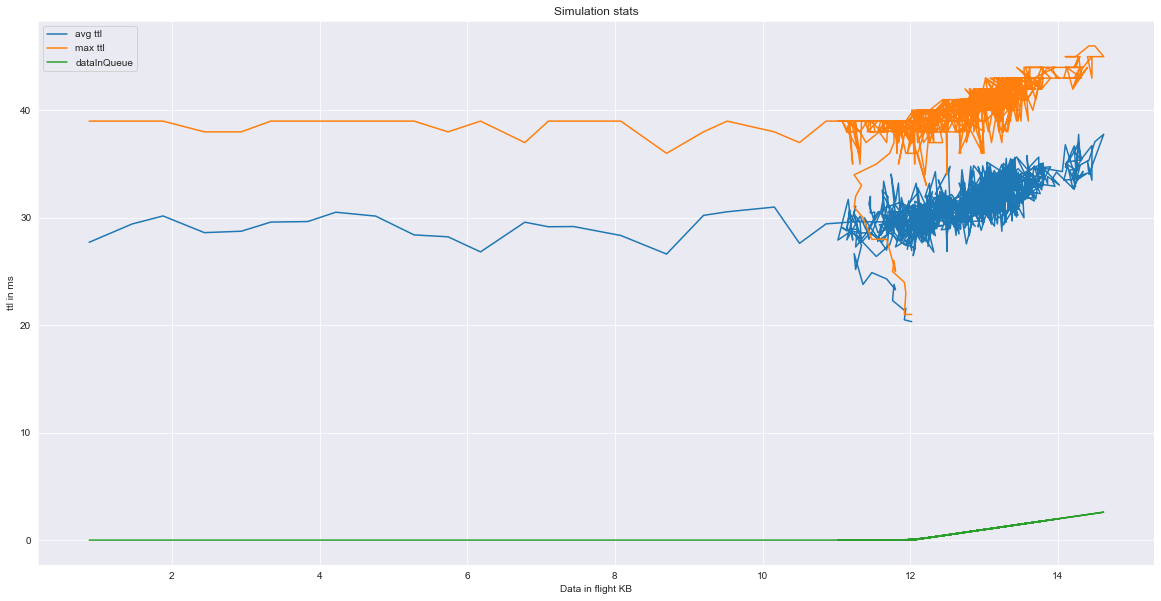

In [19]:
# data in flight vs others

plt.figure(figsize=(20,10))
print( len(simulator.stats['dataInFlight']))
print( dfStats['avgTTL'].shape)
# sns.lineplot(data=dfStats, x='dataInFlight')

plt.figure(figsize=(20,10))
plt.plot(dfStats['dataInFlight'], dfStats['avgTTL'], label="avg ttl")
plt.plot(dfStats['dataInFlight'], dfStats['maxTTL'], label="max ttl")
plt.plot(dfStats['dataInFlight'], dfStats['dataInQueue'], label="dataInQueue")
plt.title("Simulation stats")
plt.xlabel("Data in flight KB")
plt.ylabel("ttl in ms")
plt.legend()
plt.show()

In [21]:

dfStats.tail(n=50)

,avgTTL,minTTL,maxTTL,dataInFlight,dataInQueue
sentAt,,,,,
930,31.571429,22,40,13.04,1.02
931,33.444444,24,41,12.84,0.82
932,30.222222,22,39,12.88,0.86
933,29.785714,21,38,12.62,0.60
934,30.090909,22,41,12.44,0.42
935,30.315789,22,40,12.58,0.56
936,30.684211,22,41,12.48,0.46
937,31.235294,21,40,12.34,0.32
938,29.200000,21,40,12.26,0.24
